<a href="https://colab.research.google.com/github/jakejasminjk/infoproj/blob/master/BirthData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

In [1]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt 
import os 
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
sns.set_theme()

In [2]:
matplotlib.style.use('seaborn-dark-palette')

Basic imports
* Data is from a csv file
* Data is orginally from Kaggle






In [3]:
fileName = "BirthMonthsData.csv"
birthDf = pd.read_csv(fileName)
birthDf.rename(columns={"Country or Area":"country/area","Year":"year"
                    ,"Area":"area","Month":"month","Record Type":"type",
                    "Reliability":"rel", "Number_of_Births":"births"},inplace=True)
birthDf.head()

,country/area,year,area,month,type,rel,births
0,Åland Islands,2019,Total,Total,Data tabulated by year of occurrence,"Final figure, complete",267.0
1,Åland Islands,2019,Total,January,Data tabulated by year of occurrence,"Final figure, complete",28.0
2,Åland Islands,2019,Total,February,Data tabulated by year of occurrence,"Final figure, complete",24.0
3,Åland Islands,2019,Total,March,Data tabulated by year of occurrence,"Final figure, complete",26.0
4,Åland Islands,2019,Total,April,Data tabulated by year of occurrence,"Final figure, complete",16.0


# Global Birth Rates


Declining birth rates is an issue that many conutries have to deal with. It has several important implications such as a lower GDP because of the lack of workers to satisfy demand in the workforce. A decrease in birth rates also means that the country will have an ageing population that isn't been replenished. 

#Take notice of the distrubiton of births based on time


The average number of births per year


*   Peak numbers are at 1969
*   A trend of declining birth rates in the modern times
*   More people had kids back in the days compared to modern times





Text(0, 0.5, 'Number of Births')

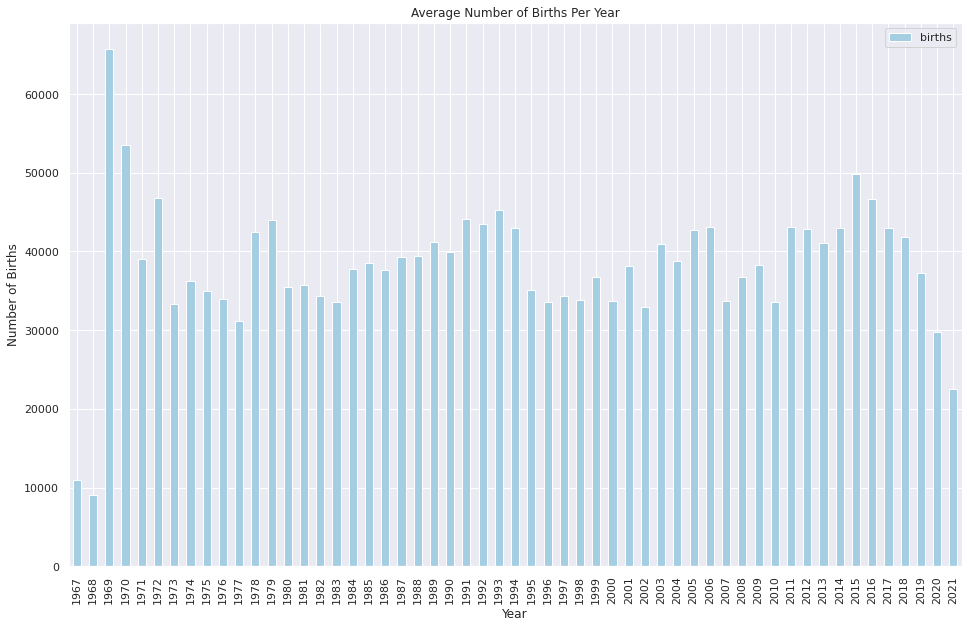

In [ ]:
ax = birthDf.groupby('year').mean().plot(kind='bar',figsize=(16,10), title="Average Number of Births Per Year", colormap='Paired')
ax.set_xlabel("Year")
ax.set_ylabel("Number of Births")



*   The shift in birth rates may be due to global events
*   The the decline started to happen around the time of covid



Text(0, 0.5, 'Number of Births')

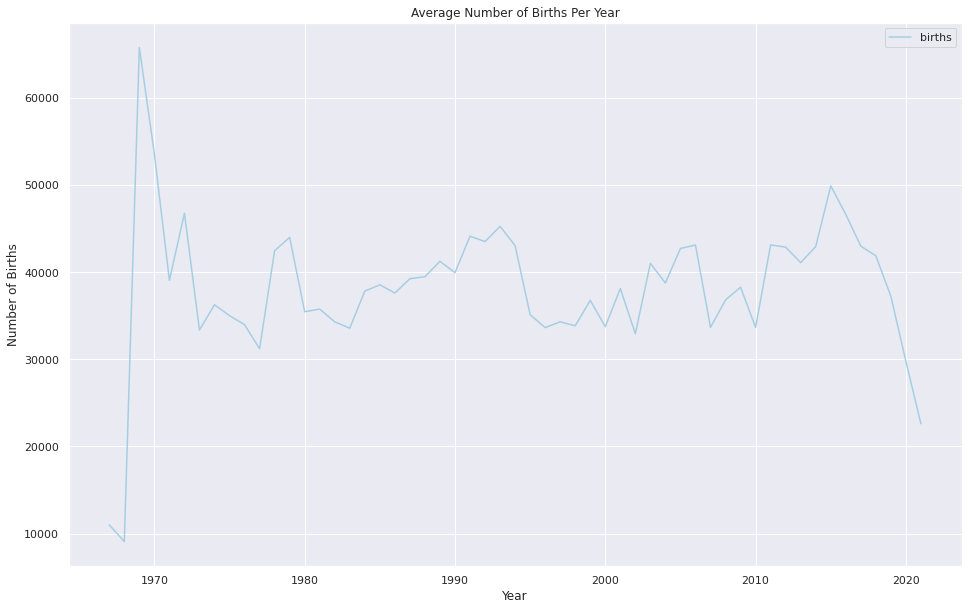

In [ ]:

ax = birthDf.groupby('year').mean().plot(kind='line',figsize=(16,10),title="Average Number of Births Per Year", colormap="Paired")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Births")

Median number of births per year


*   The current trend for median number of births is postive
*   Current data doesn't allow for any meaningful insight into future trends because of volatility 






Text(0, 0.5, 'Number of Births')

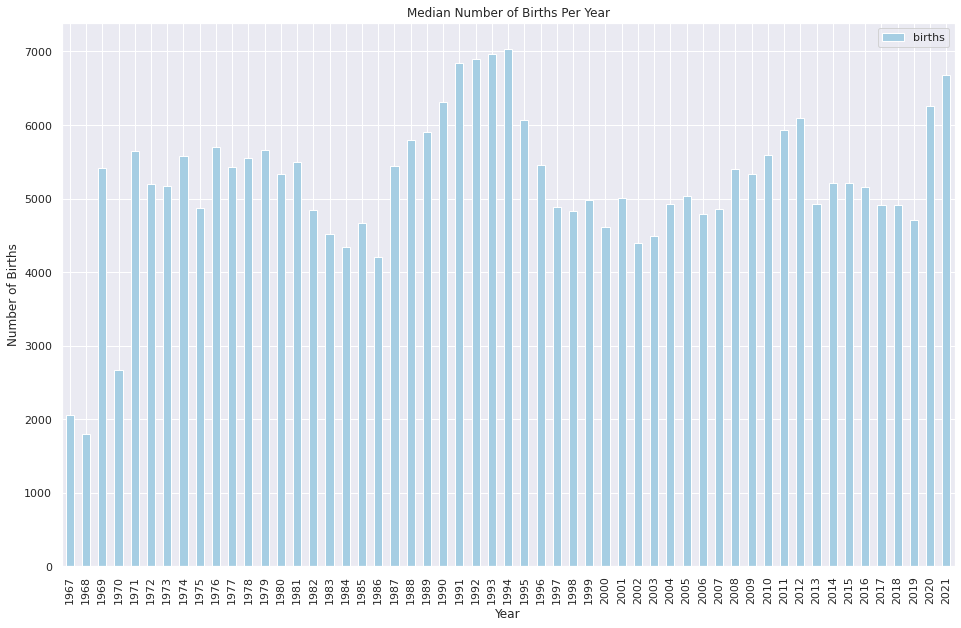

In [47]:
ax = birthDf.groupby('year').median().plot(kind='bar',figsize=(16,10),title="Median Number of Births Per Year", colormap='Paired')
ax.set_xlabel("Year")
ax.set_ylabel("Number of Births")

Text(0, 0.5, 'Number of Births')

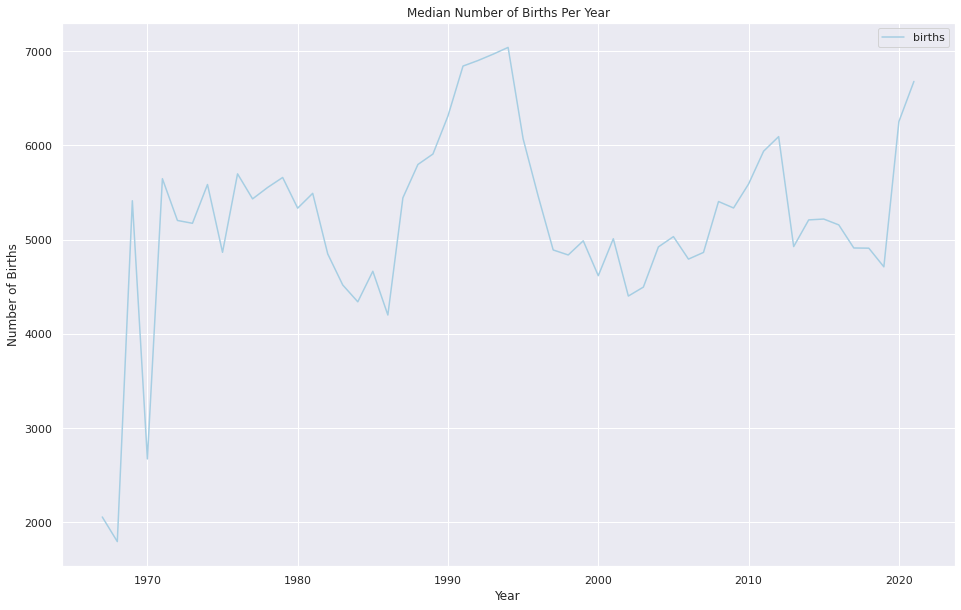

In [48]:
ax = birthDf.groupby('year').median().plot(kind='line',figsize=(16,10),title="Median Number of Births Per Year", colormap='Paired')
ax.set_xlabel("Year")
ax.set_ylabel("Number of Births")

Standard deviation of births per yea



*   Showing a downward trend although not indicative of anything substantial



Text(0, 0.5, 'Number of Births')

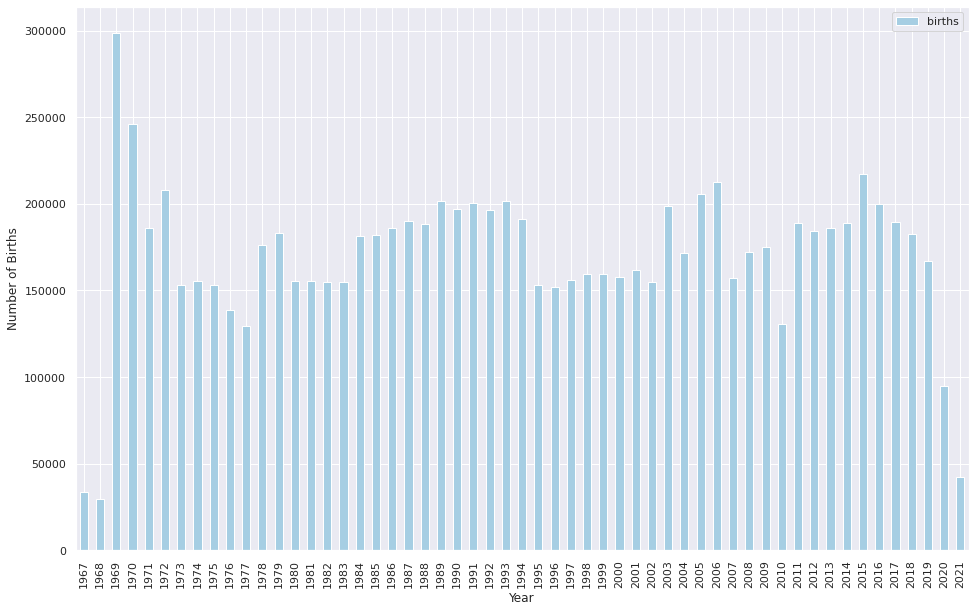

In [39]:
ax = birthDf.groupby('year').std().plot(kind='bar',figsize=(16,10), colormap='Paired')
ax.set_xlabel("Year")
ax.set_ylabel("Number of Births")

Average Number of births per month



*   The birth rate stays about consistant throughout the year for every month
*   Occasional dips may happen but nothing drastic



Text(0, 0.5, 'Number of Births')

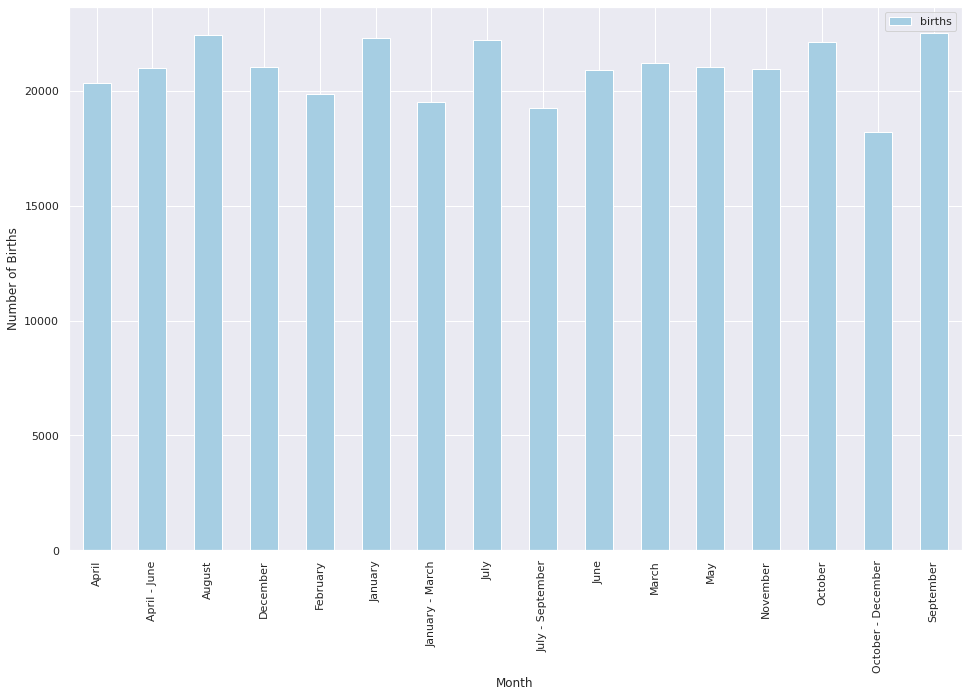

In [41]:
ax = birthDf.groupby(['month']).mean()
ax.drop(ax.columns[len(ax.columns)-2], axis=1, inplace=True)
ax.drop(ax.tail(2).index,inplace=True)
ax = ax.plot(kind='bar',figsize=(16,10), colormap='Paired')
ax.set_xlabel("Month")
ax.set_ylabel("Number of Births")

Median Births per Month

Text(0, 0.5, 'Number of Births')

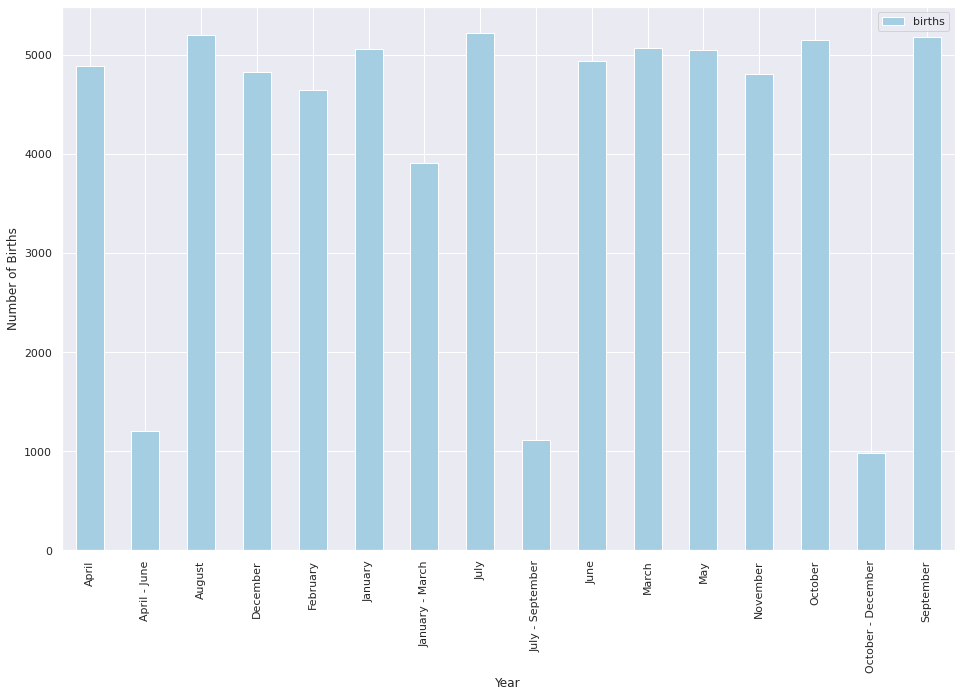

In [42]:
ax = birthDf.groupby('month').median()
ax.drop(ax.columns[len(ax.columns)-2], axis=1, inplace=True)
ax.drop(ax.tail(2).index,inplace=True)
ax = ax.plot(kind='bar',figsize=(16,10), colormap='Paired')
ax.set_xlabel("Year")
ax.set_ylabel("Number of Births")

# Further information country related


*   Number of births per month(left hand side)
*   Number of births per year(right hand side)

The data shows that larger Countries generally tend to have higher birth rates then their smaller counterparts. Altough intuitvily we know this is generally true, it helps to see the gap in a visual manner.



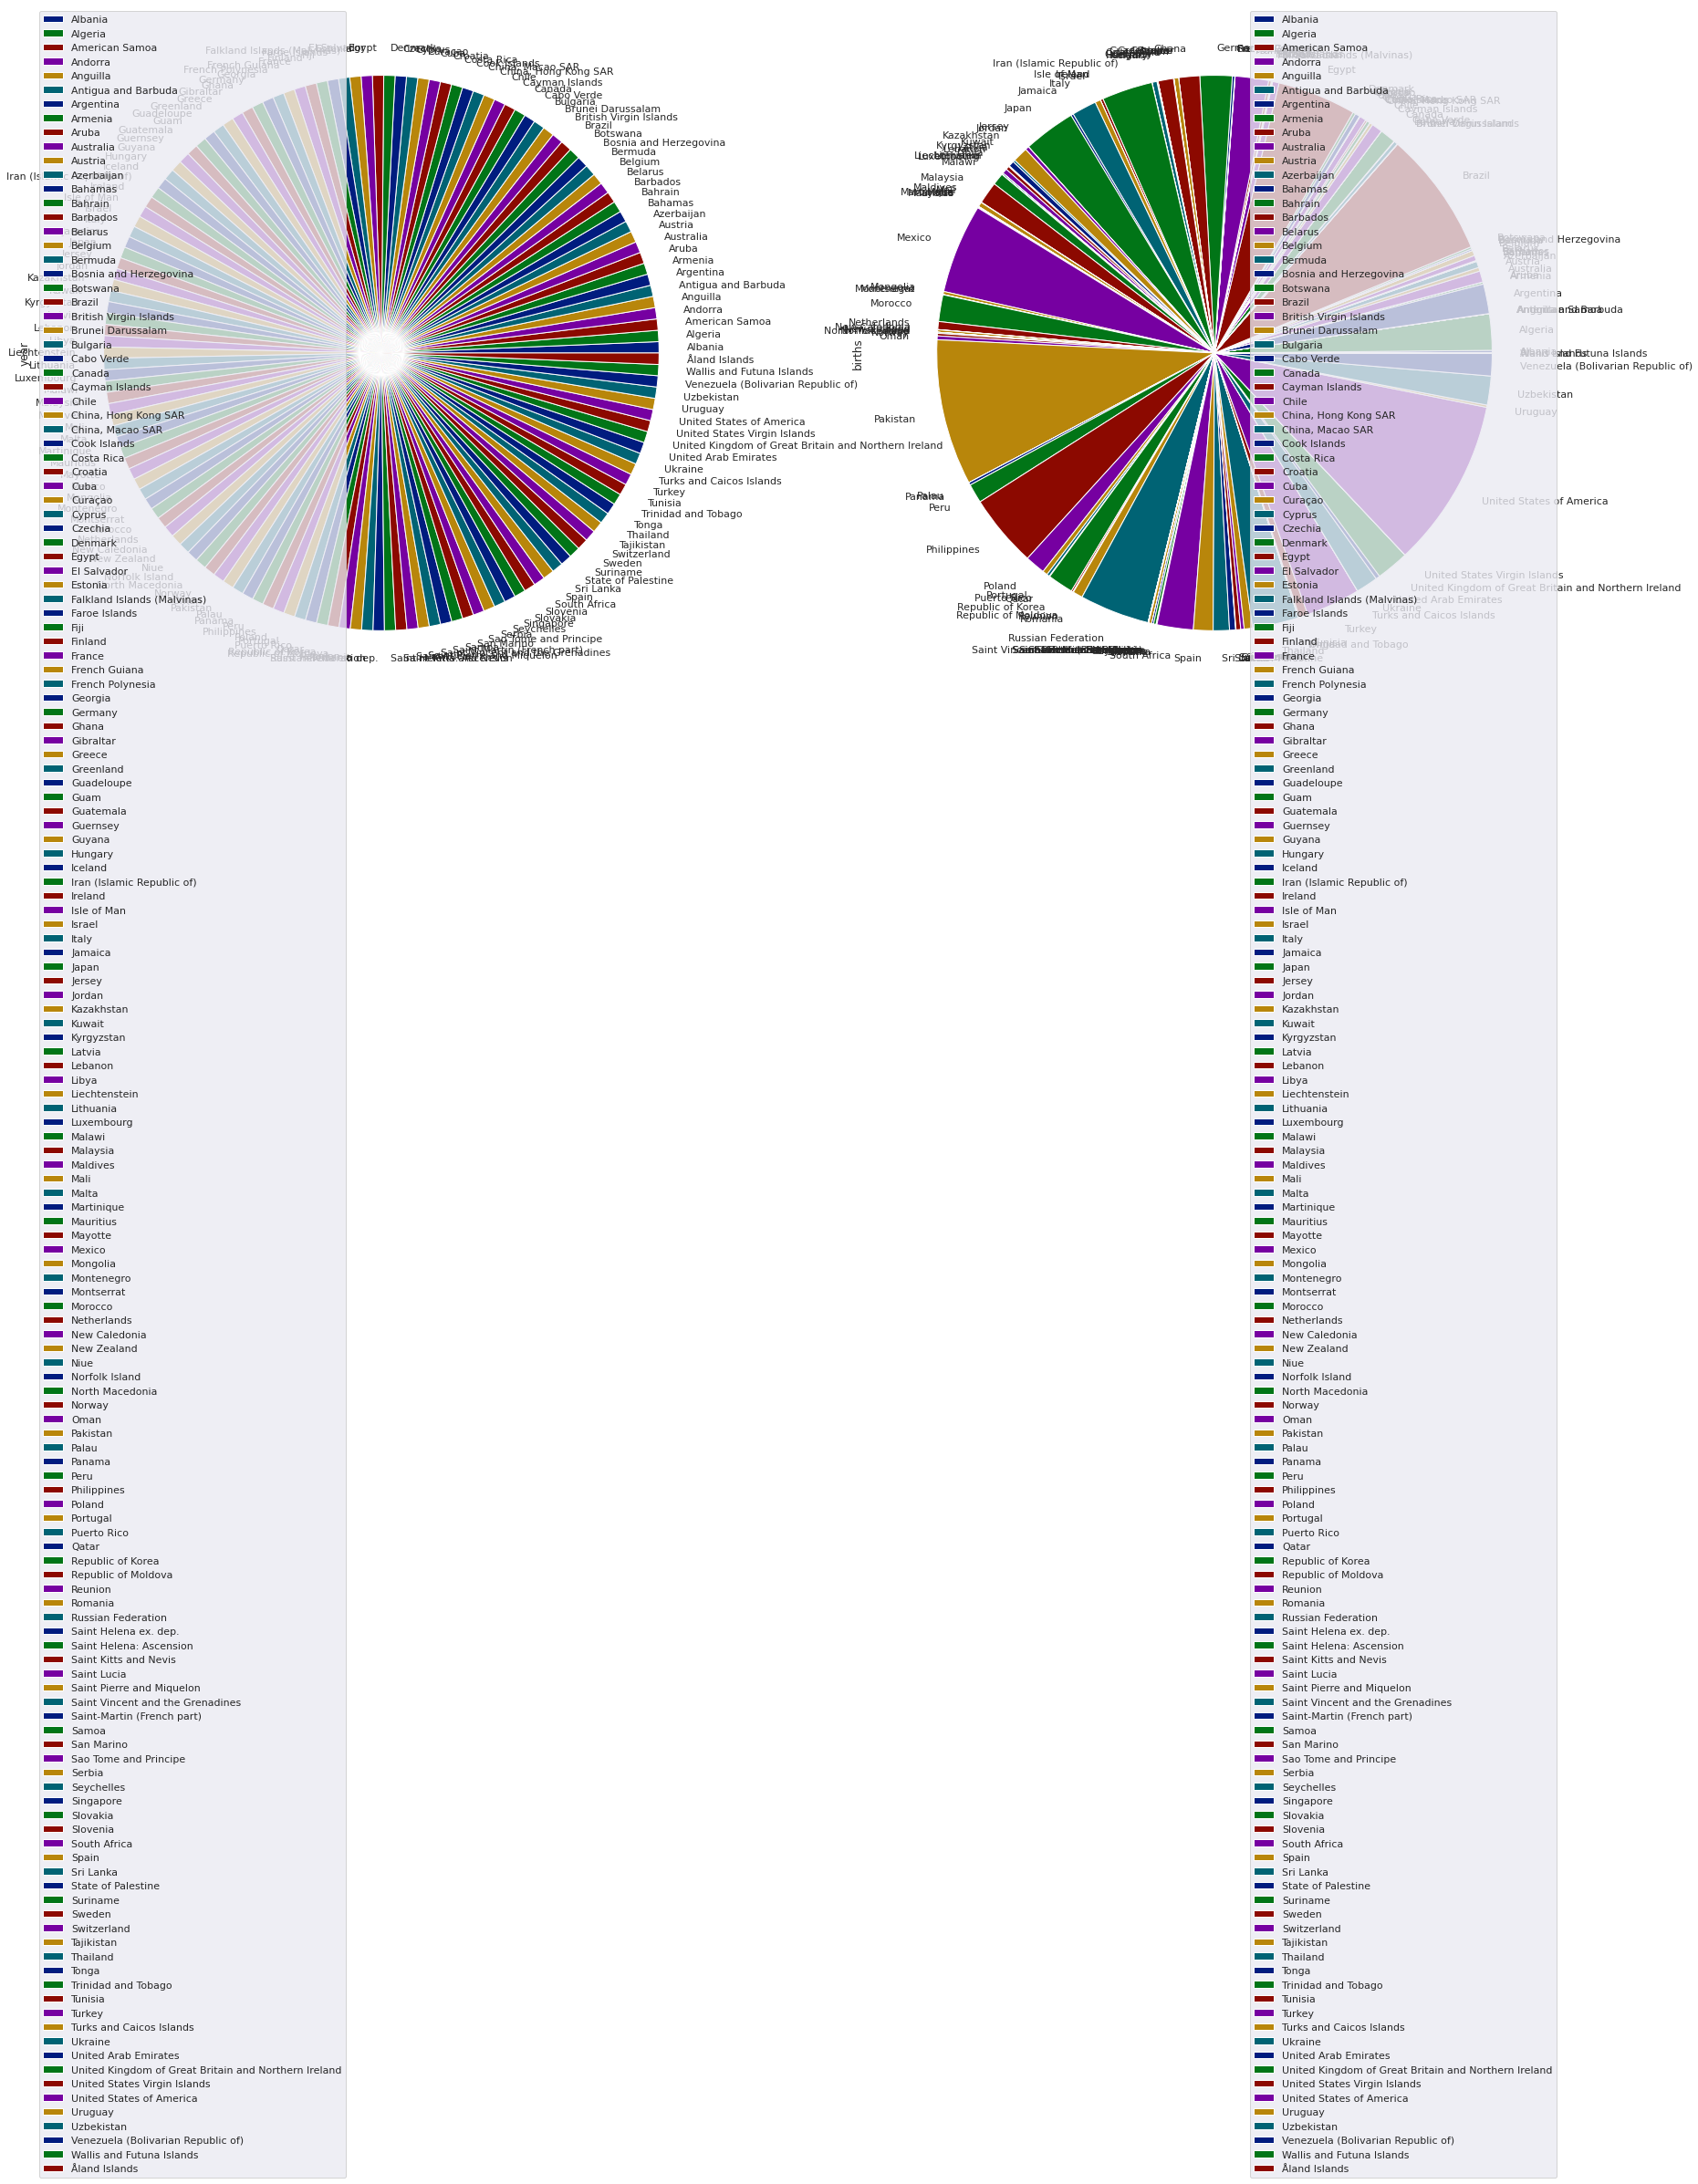

In [29]:
ax = birthDf.groupby('country/area').median().plot(kind="pie", subplots=True, figsize=(30,30))

Text(0, 0.5, 'Country/Area')

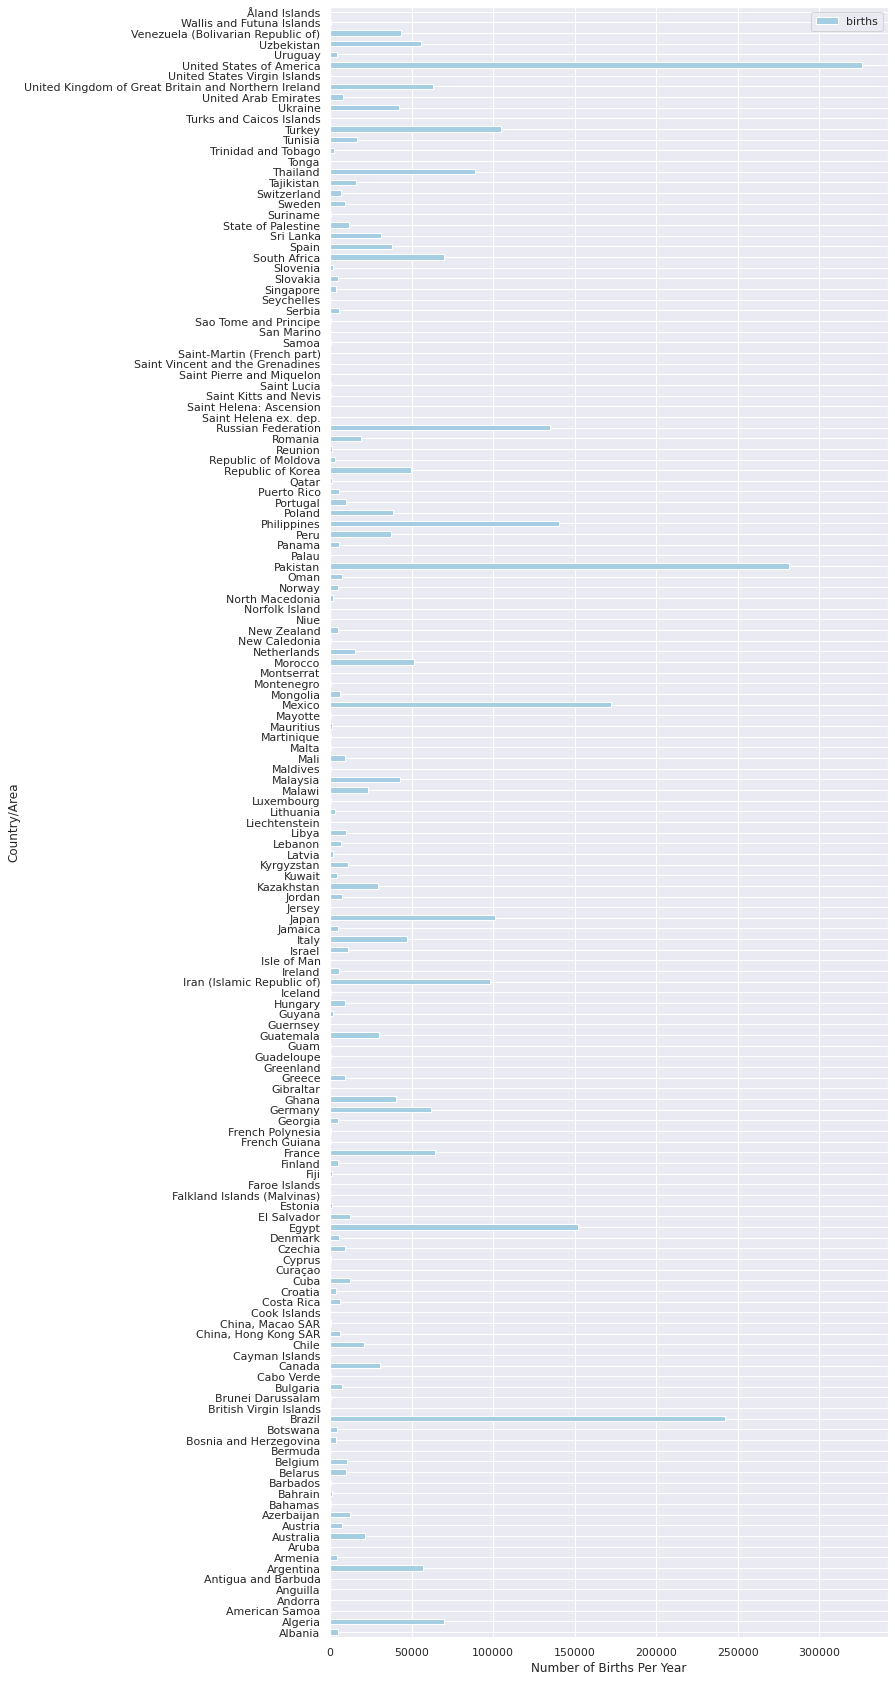

In [46]:
ax = birthDf.groupby('country/area').median()
ax.drop(ax.columns[len(ax.columns)-2], axis=1, inplace=True)
ax = ax.plot(kind="barh", figsize=(10,30), colormap='Paired')
ax.set_xlabel("Number of Births Per Year")
ax.set_ylabel("Country/Area")

# Some irregular looking Data?

You might have noticed by now that some countries have a very low amount of yearly births. Such as Andorra at 64.0 and wallis and futuna islands at 343.0. At first this seems to be strange. How could a country/area only have 64 births? Well, it all comes down to population size and the nature of the country. Although most bigger countries have bigger birth rates their are some outliers such as Japan. The data is correct in this instance.

In [32]:
ax = birthDf.groupby('country/area').median()
ax.drop(ax.columns[len(ax.columns)-2], axis=1, inplace=True)
ax

,births
country/area,
Albania,5137.0
Algeria,69952.0
American Samoa,121.0
Andorra,64.0
Anguilla,13.5
...,...
Uruguay,4431.0
Uzbekistan,55726.5
Venezuela (Bolivarian Republic of),43581.0


In [37]:
ax = birthDf.groupby(['year', 'month']).agg({'births': ['median','mean']})
#ax.plot(kind="bar", subplots=True, figsize=(20,20))
ax

births              
                       median          mean
year month                                 
1967 April             1779.0   5391.600000
     August            1977.0   6189.400000
     December          1453.0   5798.800000
     February          1952.0   5340.600000
     January           2145.0   6300.400000
...                       ...           ...
2021 January - March  13726.0  44831.800000
     July              2464.0   2464.000000
     June              4730.0  22032.000000
     March             7759.0  20755.470588
     May               4641.0  12639.357143

[870 rows x 2 columns]